# Unforced Pendulum

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The equation of an unforced pendulum with no damping is:
$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab\ddot{\theta}+\sin\theta=0,
$$
which can be written as a system:
$$
\mtab\dot{\theta}=v
$$
$$
\mtab\dot{v}=-\sin\theta
$$
Since this is a one-dimensional motion, it has a potential:
$$
\mtab V(x)=-\int(-\sin\theta)\,d\theta=-\cos\theta,
$$
so the total energy:
$$
\mtab E=\frac{v^2}{2}-\cos\theta
$$
is a conserved quantity. So we can display the trajectories by plotting the contours of the total energy function.


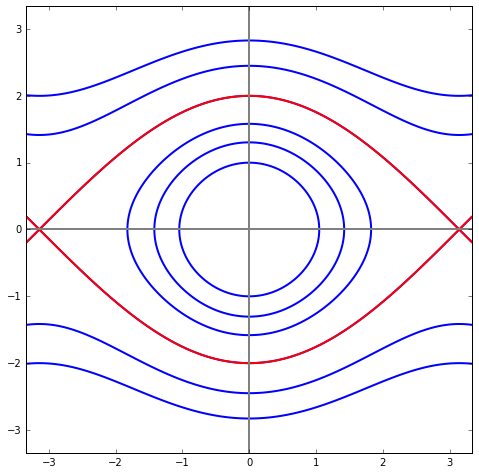

In [4]:
x = arange(-pi-0.2, pi+0.2, 0.01)
y = arange(-pi-0.2, pi+0.2, 0.01)
X, Y = np.meshgrid(x, y)
Z = 0.5 * Y ** 2 - cos(X)
figure(figsize=(8,8))
plt.axhline(0,lw=2, color='gray')
plt.axvline(0,lw=2, color='gray')
plt.contour(X, Y, Z, [ -0.5, -0.15,  0.25, 1, 2, 3], colors = 'blue', linewidths = 2, linestyles='solid')
plt.contour(X, Y, Z, [ 1], colors = 'red', linewidths = 2, linestyles='solid')
#plt.clabel(CS, inline=1, fontsize=10)

The red contour corresponds to the two heteroclinic orbits connecting the equilibrium points $(-\pi,0)$ and $(\pi,0)$. We just display the phase-space from $\theta=-\pi$ to $\theta=\pi$ because the figure is periodic.
Things to notice:

- The picture is symmetric with respect to the $\theta$ axis, since the system is time-reversible.
- The equilibrium point at the origin is a nonlinear center. (Proof: use either time-reversibility or the fact that the system is conservative.)

We could also plot the trajectories by solving the system numerically. First define the auxiliary function:

In [5]:
from scipy.integrate import odeint
def solve_de(sysfunc, y0, t0, tmin, tmax, npoints=200, **kwargs):
    tleft = linspace(t0, tmin, npoints)
    yleft = odeint(sysfunc, y0, tleft, **kwargs)
    tright = linspace(t0, tmax, npoints)
    yright = odeint(sysfunc, y0, tright, **kwargs)
    return concatenate((yleft[-1:0:-1], yright))

The system is (we use the variables $x$ for $\theta$ and $y$ for $v$):

In [6]:
def sysfunc(xvec,t):
    x, y = xvec
    return array([ y,
                   -sin(x)])

Now we are ready to plot the solutions:

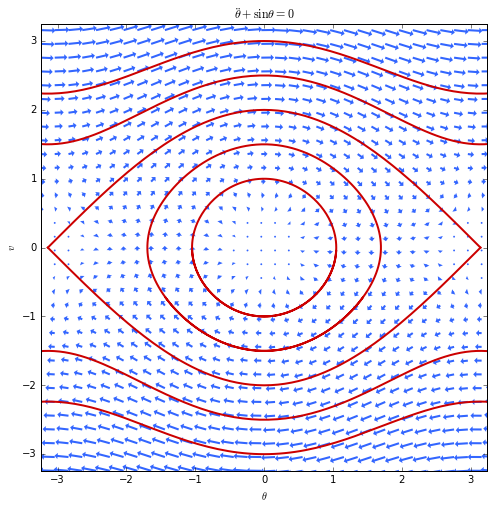

In [7]:
# Options for quiver() function.
# See documentation of quiver() for meaning of parameters.
quiver_opts = dict(units='x',
                   scale=15,
                   width=0.03,
                   headwidth=3,
                   headlength=1.5,
                   headaxislength=1.5,
                   color='#3366FF',
                   alpha=1.0)
# These define the range of
# the plot, and the interval
# at which arrows are plotted.
xyrange = pi + 0.1                                  
r = arange(-xyrange-1, xyrange+1, 0.2)
X, Y = meshgrid( r, r )
# Initial conditions
# Specify time range for each solution
ics = [[[0, 1], -5, 5],
       [[0, 2], -10, 10],
       [[0, -2], -10, 10],
       [[0, 1.5], -5, 5],
       [[0, 2.5], -5, 5],
       [[0, -2.5], -5, 5],
       [[0, -3], -5, 5],
       [[0, 3], -5, 5],
       ]
# Number of points in solution
npoints = 200
# Define figure and axes
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)
axis([-xyrange, xyrange, -xyrange, xyrange])
# Plot direction field
U, V = sysfunc([X, Y], 0)
Q = quiver( X, Y, U, V, **quiver_opts)
t0 = 0
for y0, tmin, tmax in ics:
    y = solve_de(sysfunc, y0, t0, tmin, tmax, npoints=npoints)
    plot(*zip(*y), lw=2, color='#CC0000', aa=True)
    pass
xlabel(r'$\theta$')
ylabel(r'$v$')
title(r'$\ddot{\theta}+\sin\theta=0$')

Let's now consider the damped pendulum:
$$
\mtab\ddot{\theta}+b\dot{\theta}+\sin\theta=0,
$$
or, as a system:
$$
\mtab\dot{\theta}=v
$$
$$
\mtab\dot{v}=-\sin\theta-bv
$$
Now energy is not conserved (the system is _dissipative_), and we need to use numerical solutions.

In [8]:
b = 0.2
def sysfunc(xvec,t):
    x, y = xvec
    return array([ y,
                   -sin(x) - b * y])

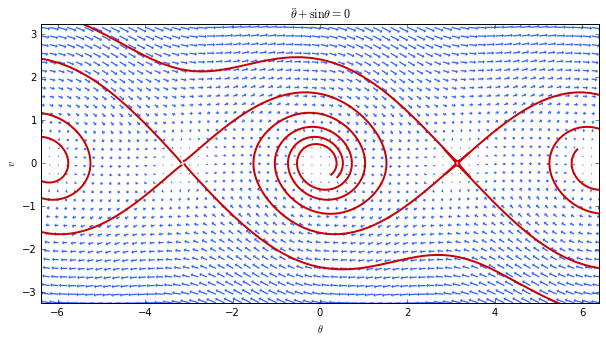

In [9]:
# Options for quiver() function.
# See documentation of quiver() for meaning of parameters.
quiver_opts = dict(units='x',
                   scale=15,
                   width=0.03,
                   headwidth=3,
                   headlength=1.5,
                   headaxislength=1.5,
                   color='#3366FF',
                   alpha=1.0)
# These define the range of
# the plot, and the interval
# at which arrows are plotted.
xxrange = 2 * pi + 0.1
yyrange = pi + 0.1
rx = arange(-xxrange-1, xxrange+1, 0.2)
ry = arange(-yyrange-1, yyrange+1, 0.2)
X, Y = meshgrid( rx, ry )
# Initial conditions
# Specify time range for each solution
# Number of points in solution
npoints = 200
# Define figure and axes
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
axis([-xxrange, xxrange, -yyrange, yyrange])
# Plot direction field
U, V = sysfunc([X, Y], 0)
Q = quiver( X, Y, U, V, **quiver_opts)
t0 = 0
ics = [[[-pi+0.1, 0.1], -1, 20],
       [[-pi+0.1, -0.1], -10, 1],
       [[-pi-0.1, 0.1], -20, 1],
       [[-pi-0.1, -0.1], -1, 20],
       [[pi-0.1, 0.1], -1, 20],
       [[pi-0.1, -0.1], -10, 1],
       [[pi+0.1, 0.1], -20, 1],
       [[pi+0.1, -0.1], -1, 20],
       ]
for y0, tmin, tmax in ics:
    y = solve_de(sysfunc, y0, t0, tmin, tmax, npoints=npoints)
    plot(*zip(*y), lw=2, color='#CC0000', aa=True)
xlabel(r'$\theta$')
ylabel(r'$v$')
title(r'$\ddot{\theta}+\sin\theta=0$')

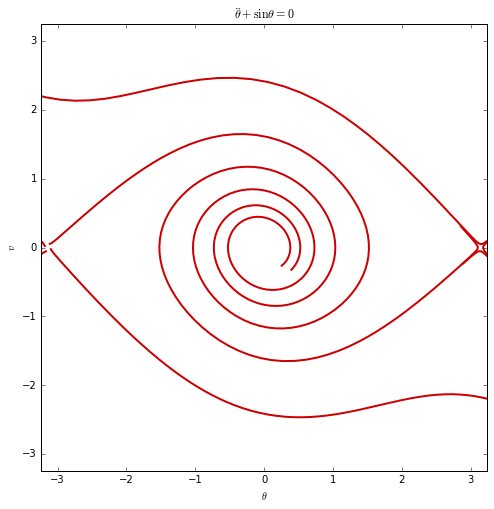

In [10]:
# Options for quiver() function.
# See documentation of quiver() for meaning of parameters.
quiver_opts = dict(units='x',
                   scale=15,
                   width=0.03,
                   headwidth=3,
                   headlength=1.5,
                   headaxislength=1.5,
                   color='#3366FF',
                   alpha=1.0)
# These define the range of
# the plot, and the interval
# at which arrows are plotted.
xxrange = pi + 0.1
yyrange = pi + 0.1
rx = arange(-xxrange-1, xxrange+1, 0.2)
ry = arange(-yyrange-1, yyrange+1, 0.2)
X, Y = meshgrid( rx, ry )
# Initial conditions
# Specify time range for each solution
# Number of points in solution
npoints = 200
# Define figure and axes
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)
axis([-xxrange, xxrange, -yyrange, yyrange])
# Plot direction field
U, V = sysfunc([X, Y], 0)
#Q = quiver( X, Y, U, V, **quiver_opts)
t0 = 0
ics = [[[-pi+0.1, 0.1], -1, 20],
       [[-pi+0.1, -0.1], -10, 1],
       [[-pi-0.1, 0.1], -20, 1],
       [[-pi-0.1, -0.1], -1, 20],
       [[pi-0.1, 0.1], -1, 20],
       [[pi-0.1, -0.1], -10, 1],
       [[pi+0.1, 0.1], -20, 1],
       [[pi+0.1, -0.1], -1, 20],
       ]
for y0, tmin, tmax in ics:
    y = solve_de(sysfunc, y0, t0, tmin, tmax, npoints=npoints)
    plot(*zip(*y), lw=2, color='#CC0000', aa=True)
xlabel(r'$\theta$')
ylabel(r'$v$')
title(r'$\ddot{\theta}+\sin\theta=0$')